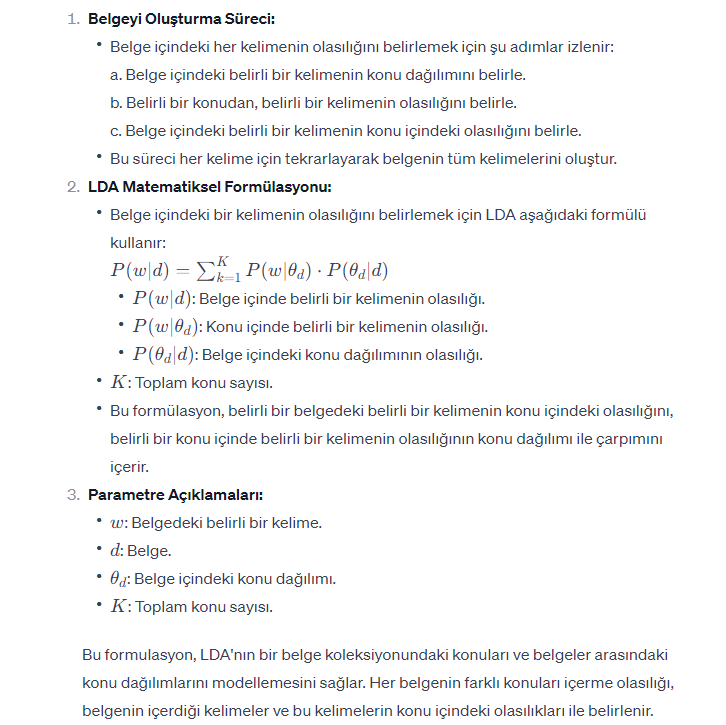

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Örnek metin verileri
documents = [
    "Bu bir örnek cümle.",
    "Python programlama dili kullanarak LDA öğreniyorum.",
    "Doğal dil işleme konuları ilginçtir.",
    "LDA ile belge konularını çıkarmak mümkündür."
]

# Metin verilerini vektörleştirmek için CountVectorizer kullan
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
print(X)

# LDA modelini eğit
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Eğitilmiş modelin konu dağılımlarını ve kelimelerin konu katkılarını görüntüle
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
    print()

# Belge konu karışımlarını al
document_topic_mixtures = lda_model.transform(X)
print("Belge Konu Karışımları:")
print(document_topic_mixtures)


  (0, 2)	1
  (0, 1)	1
  (0, 18)	1
  (0, 3)	1
  (1, 16)	1
  (1, 15)	1
  (1, 5)	1
  (1, 12)	1
  (1, 13)	1
  (1, 19)	1
  (2, 6)	1
  (2, 4)	1
  (2, 9)	1
  (2, 10)	1
  (2, 8)	1
  (3, 13)	1
  (3, 7)	1
  (3, 0)	1
  (3, 11)	1
  (3, 17)	1
  (3, 14)	1
Topic #1:
['örnek', 'cümle', 'bu', 'bir', 'lda']

Topic #2:
['konularını', 'ile', 'mümkündür', 'çıkarmak', 'belge']

Topic #3:
['kullanarak', 'programlama', 'python', 'öğreniyorum', 'lda']

Belge Konu Karışımları:
[[0.06794862 0.06710549 0.86494589]
 [0.04851583 0.04899304 0.90249113]
 [0.05668344 0.88735127 0.05596529]
 [0.04857622 0.90222798 0.0491958 ]]


In [9]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

# Rastgele sayılardan oluşan veri seti
np.random.seed(42)
data = np.random.randint(0, 10, size=(100, 5))

# LDA modelini eğit
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(data)

# Her örneğin ait olduğu konuları göster
document_topic_assignments = np.argmax(lda_model.transform(data), axis=1)
print("Örnek Konu Atamaları:")
print(document_topic_assignments)


Örnek Konu Atamaları:
[0 1 2 1 0 2 0 2 0 0 0 0 1 0 0 1 2 1 0 1 0 1 2 2 1 0 1 1 1 2 2 0 1 2 0 0 1
 2 2 1 0 1 0 2 2 0 0 2 0 1 1 2 0 0 2 0 1 1 1 2 1 2 0 1 1 0 0 0 1 1 0 1 2 2
 2 1 2 1 0 0 0 0 2 2 0 1 2 2 0 2 0 1 0 1 1 0 2 0 2 2]


               SINIF                                              YORUM
0  Thunderstorm Wind  Large tree down between Plantersville and Nett...
1         Heavy Rain  One to two feet of deep standing water develop...
2  Thunderstorm Wind  NWS Columbia relayed a report of trees blown d...
3  Thunderstorm Wind  Media reported two trees blown down along I-40...
4               Hail                                                   
0    Large tree down between Plantersville and Nett...
1    One to two feet of deep standing water develop...
2    NWS Columbia relayed a report of trees blown d...
3    Media reported two trees blown down along I-40...
4                                                     
5    A few tree limbs greater than 6 inches down on...
6    Awning blown off a building on Lamar Avenue. M...
7                     Quarter size hail near Rosemark.
8    Tin roof ripped off house on Old Memphis Road ...
9    Powerlines down at Walnut Grove and Cherry Lan...
Name: YORUM, dtype

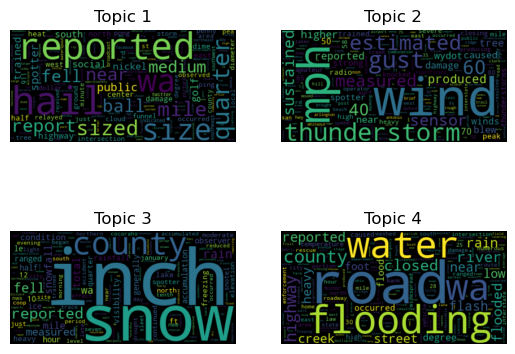

[[0.07142857 0.07142858 0.07142857 0.07142915 0.57108585 0.07143778
  0.0717615 ]]


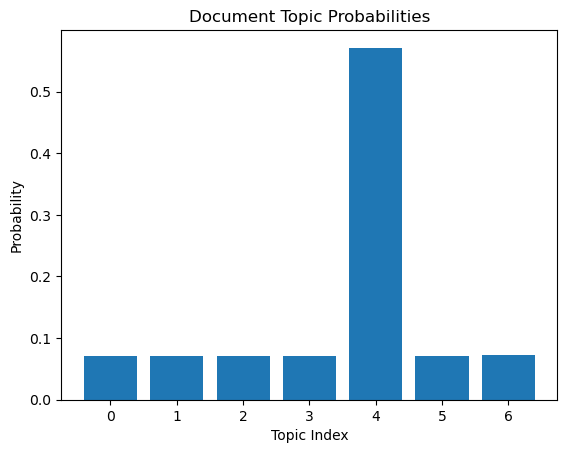

In [16]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Veriyi oku
data = pd.read_csv("WeatherReports.csv", dtype={'YORUM': str})

# NaN değerleri temizle ve uygun bir dize ile doldur
data['YORUM'] = data['YORUM'].fillna('')

# Verinin başlığını görüntüle
print(data.head())

# Metin verilerini al
text_data = data['YORUM']
print(text_data[:10])

# Metin verilerini işle
def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

processed_documents = text_data.apply(preprocess_text)
print(processed_documents[:5])



# Bag of Words oluştur
vectorizer = CountVectorizer(stop_words='english', min_df=2)
X = vectorizer.fit_transform(processed_documents)
feature_names = vectorizer.get_feature_names_out()

# Modeli eğit
num_topics = 7
lda_model = LatentDirichletAllocation(n_components=num_topics, verbose=0)
lda_model.fit(X)


# Eğitilmiş modelin konu dağılımlarını ve kelimelerin konu katkılarını görüntüle
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
    print()
    
    
# Word cloud görselleştirme
for topic_idx in range(1, 5):
    plt.subplot(2, 2, topic_idx)
    wordcloud = WordCloud().generate_from_frequencies(dict(zip(feature_names, lda_model.components_[topic_idx - 1])))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Topic " + str(topic_idx))
    plt.axis("off")

plt.show()

# Yeni belgeyi işle ve konu karışımını hesapla
new_document = ["It is too cold and rainy. Take an umbrella."]
new_document_processed = preprocess_text(new_document[0])
new_document_vectorized = vectorizer.transform([new_document_processed])
topic_mixture = lda_model.transform(new_document_vectorized)

print(topic_mixture)
# Belge konu olasılıklarını görselleştirme
plt.bar(range(num_topics), topic_mixture.flatten())
plt.xlabel("Topic Index")
plt.ylabel("Probability")
plt.title("Document Topic Probabilities")
plt.show()


